# Исключение
 - это специальная объект, который используется в Python для обработки ошибок. Когда она появляется конкретно? Когда наша программа при выполнении кода натыкается на ошибку Python создает объект исключения после чего с момента, где это исключение произошло ло, программа не может продолжать работу и выбрасывает этот объект.

Какие исключения нам известны на текущем этапе ?

In [ ]:
ZeroDivisionError # Исключение деления на ноль
ValueError # Исключение неверного типа данных
TypeError # Исключение неверного типа данных

# Обработка исключений

## Try-Except

- это специальная конструкция, которая используется для обработки ошибок в процессе выполнения кода. Служит она для того чтобы исправлять возникающую ошибку и возможную. 


In [1]:
def divide_func(a,b):
    return a/b

print(divide_func(10,5))

2.0


In [3]:
print(divide_func(10,0))
print('Код дошел до этой строки?')

ZeroDivisionError: division by zero

Как изолировать эту область на предмет ошибки ZeroDioDivisionError

In [5]:
def divide_func(a,b):
    try:
        return a/b
    except:
        return 0

print(divide_func(10,5))
print(divide_func(10,0))
print(divide_func(10,'a'))
print(divide_func(10,'20'))
print('Мы долши до этой строки?')


2.0
0
0
0
Мы долши до этой строки?


Если в блоке except не указывать какую именно ошибку мы изолируем, то обрабатываться будут абсолютно все ошибки, применят на свой страх и риск, так как в дальнейшем может превести к непредвиденным последствиям. Лучшее применения такого способа исключительно для логирования ошибки.

In [8]:
def divide_func(a,b):
    try:
        return a/b
    except ZeroDivisionError:
        return 0
    except TypeError:
        return 'Ошибка! Неверно передано значение'

print(divide_func(10,5))
print(divide_func(10,0))
print(divide_func(10,'a'))
print(divide_func(10,'20'))
print('Мы долши до этой строки?')


2.0
0
Ошибка! Неверно передано значение
Ошибка! Неверно передано значение
Мы долши до этой строки?


Блоков Except у try может сколь-угодно много. Однако try в контексте определенной проверки может быть только один.

В рассмотреных ранее примерах, мы получали исключения но не получали полное описание той поблемы с которой столкнулась программа при обработке кода. Из за этого в процессе отладки ошибки можно протратить много времени на поиск конкретной причины.

Поэтому дальнешийе конструкции except рекомендуется выполнять следующим образом

In [9]:
def divide_func(a,b):
    try:
        return a/b
    except ZeroDivisionError as exc:
        print(f'Внимание! Возможная ошибка: {exc}')
        return 0
    except TypeError as e:
        return f'Ошибка! Неверно передано значение. {e}'

print(divide_func(10,5))
print(divide_func(10,0))
print(divide_func(10,'a'))
print(divide_func(10,'20'))
print('Мы долши до этой строки?')


2.0
Внимание! Возможная ошибка: division by zero
0
Ошибка! Неверно передано значение. unsupported operand type(s) for /: 'int' and 'str'
Ошибка! Неверно передано значение. unsupported operand type(s) for /: 'int' and 'str'
Мы долши до этой строки?


raise - кострукция которая ВЫЗЫВАЕТ объект исключения в месте где raise был объявлен

Exception - это класс-родитель(основатель) любой ошибки которая может происходить в коде. При вызове является САМЫМ общим случаем

Порядок обработки ошибки, должен быть всегда от частного(TypeError) к общему(Exception). Также есть внутренние группы ошибок такие как ArifmeticError (ZeroDivisonError его потомок), поэтому указать родителя ошибки, то это будет общий случай для этой группы ошибок

In [16]:
def divide_func(a=None,b=None):
    try:
        # raise NameError('Какой то текст ошибки')
        a = int(input('Введите первое число: ')) if not a else a
        b = int(input('Введите первое число: ')) if not b else b
        return a/b
    except ZeroDivisionError as exc:
        print(f'Внимание! Возможная ошибка: {exc}')
        return 0
    except ArithmeticError as e: # Принимает OverflowError, FloatingPointError но не ZeroDivisionError потому что он уже обработан в частном порядке
        print(f'Арифметическая ошибка: {e}')
    except (TypeError, ValueError) as e:
        return f'Ошибка! Неверно передано значение. {e}'
    except Exception as e:
        print(f'Неожиданная ошибка: {e.__class__.__name__} - {e}')


print(divide_func(10,5))
print(divide_func(10,0))
print(divide_func(10,'a'))
print(divide_func(10,'20'))
print(divide_func(10,'20'))
print(divide_func())
print('Мы долши до этой строки?')


2.0
Ошибка! Неверно передано значение. invalid literal for int() with base 10: ''
Ошибка! Неверно передано значение. unsupported operand type(s) for /: 'int' and 'str'
Ошибка! Неверно передано значение. unsupported operand type(s) for /: 'int' and 'str'
Ошибка! Неверно передано значение. unsupported operand type(s) for /: 'int' and 'str'
Ошибка! Неверно передано значение. invalid literal for int() with base 10: ''
Мы долши до этой строки?


finally - это конструкция которая исполняется в любом случае после выполнения блока try-except и её основной смысл это сделать заключающие(завершающие)действия в отношении той структуры кода которая требует специального завершения(завершение эмулятора, конец работы с БД)

In [18]:
def divide_func(a=None,b=None):
    try:
        # raise NameError('Какой то текст ошибки')
        a = int(input('Введите первое число: ')) if not a else a
        b = int(input('Введите первое число: ')) if not b else b
        return a/b
    except ZeroDivisionError as exc:
        print(f'Внимание! Возможная ошибка: {exc}')
        return 0
    except ArithmeticError as e: # Принимает OverflowError, FloatingPointError но не ZeroDivisionError потому что он уже обработан в частном порядке
        print(f'Арифметическая ошибка: {e}')
    except (TypeError, ValueError) as e:
        return f'Ошибка! Неверно передано значение. {e}'
    except Exception as e:
        print(f'Неожиданная ошибка: {e.__class__.__name__} - {e}')
    finally:
        print(f'Конец выполнения функции {divide_func.__name__}')


print(divide_func(10,5))
print(divide_func(10,0))
print(divide_func(10,'a'))
print(divide_func(10,'20'))
print(divide_func(10,'20'))
print(divide_func())
print('Мы долши до этой строки?')


Конец выполнения функции divide_func
2.0
Конец выполнения функции divide_func
1.0
Конец выполнения функции divide_func
Ошибка! Неверно передано значение. unsupported operand type(s) for /: 'int' and 'str'
Конец выполнения функции divide_func
Ошибка! Неверно передано значение. unsupported operand type(s) for /: 'int' and 'str'
Конец выполнения функции divide_func
Ошибка! Неверно передано значение. unsupported operand type(s) for /: 'int' and 'str'
Конец выполнения функции divide_func
Ошибка! Неверно передано значение. invalid literal for int() with base 10: 'f'
Мы долши до этой строки?


In [20]:
try:
    print(1)
finally:
    print('Отработано')

1
Отработано


# Стек вызова исключения

При работе с вызовом исключений в вложенных функциях(которые вызываются внутри друг друга) если происзодит ошибка, то ход фукнции завершается выбрасываением Exception до тех пор пока не будет отловлен теми фукнцями в последовательности, которые в с свою очередь участвуют в стеке вызова.

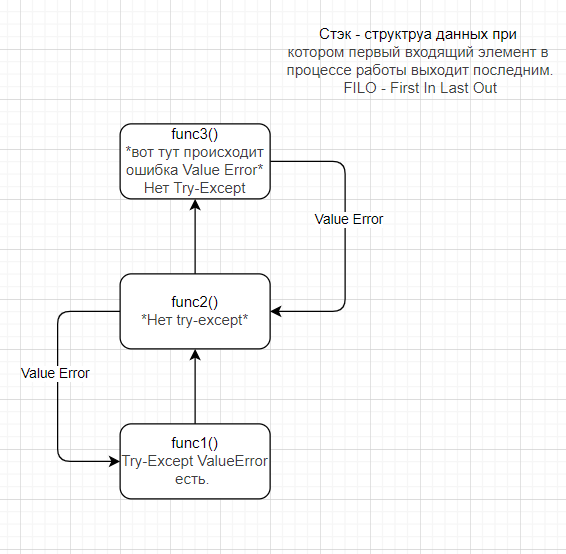

In [23]:
def func1():
    try:
        print('Запуск основной функции')
        return func2()
    except ValueError as e:
        print('Возникла ошибка и обратана func1: ', e)
    finally:
        print('Завершение основной функции')

def func2():
    print('Запуск вложенной функции func2')
    result = func3()
    print('Завершение вложенной функции func2')
    return result

def func3():
    print('Запуск 3тей вложенной функции func3')
    raise ValueError('Это ошибка из 3тей функции')

func1()

Запуск основной функции
Запуск вложенной функции func2
Запуск 3тей вложенной функции func3
Возникла ошибка и обратана func1:  Это ошибка из 3тей функции
Завершение основной функции


Что такое Traceback? 

- Это отображение последовательности вызовов функций, которые привели к ошибке. 
- В Python traceback обычно начинается с строки кода, где произошла ошибка, и заканчивается строкой кода, в которой была вызвана основная функция. Также выписывается информация об ошибке, например, тип ошибки и сообщение об ошибке.

Использование библиотеки traceback для получения более подробной информации об ошибки

traceback.format_exc() - это специальная функция, которая преобразует объект исключения в строку с подробной информацией об ошибке. Это полезно для отладки кода и получения более конкретной информации о проблеме.


In [24]:
import traceback


def func1():
    try:
        print('Запуск основной функции')
        return func2()
    except Exception as e:
        print(traceback.format_exc())
    # except ValueError as e:
    #     print('Возникла ошибка и обратана func1: ', e)
    finally:
        print('Завершение основной функции')

def func2():
    print('Запуск вложенной функции func2')
    result = func3()
    print('Завершение вложенной функции func2')
    return result

def func3():
    print('Запуск 3тей вложенной функции func3')
    raise ValueError('Это ошибка из 3тей функции')

func1()

Запуск основной функции
Запуск вложенной функции func2
Запуск 3тей вложенной функции func3
Traceback (most recent call last):
  File "C:\Users\NatalkaNerealka\AppData\Local\Temp\ipykernel_3120\2546364968.py", line 7, in func1
    return func2()
           ^^^^^^^
  File "C:\Users\NatalkaNerealka\AppData\Local\Temp\ipykernel_3120\2546364968.py", line 17, in func2
    result = func3()
             ^^^^^^^
  File "C:\Users\NatalkaNerealka\AppData\Local\Temp\ipykernel_3120\2546364968.py", line 23, in func3
    raise ValueError('Это ошибка из 3тей функции')
ValueError: Это ошибка из 3тей функции

Завершение основной функции


# Создание собственных исключений

Собственные исключения создаются на основе класса Exception, и должно содержать параметр message который будет передаваться первым аргументом в `__init__` метод Exception `(super().__init__(...))`.

In [26]:
class MyException(Exception):
    def __init__(self, reason, message='Произошла ошибка в коде: %s', *args):
        self.message = message % reason
        super().__init__(self.message, *args)

def func1():
    try:
        print('Запуск основной функции')
        return func2()
    except MyException as e:
        print(f'{e.message=}')
        print(f'{e=}')
    finally:
        print('Завершение основной функции')

def func2():
    print('Запуск вложенной функции func2')
    raise MyException('Какая то причина')

func1()


Запуск основной функции
Запуск вложенной функции func2
e.message='Произошла ошибка в коде: Какая то причина'
e=MyException('Произошла ошибка в коде: Какая то причина')
Завершение основной функции


In [28]:
class NegativeAgeError(Exception):
    def __init__(self, age, message = 'Возраст не может быть отрицательным', *args):
        self.age = age
        self.message = message
        super().__init__(message, age, *args)
        
def check_age(age):
    if age < 0:
        raise NegativeAgeError(age)

def validate_user_age(): 
    try: 
        age = int(input("Введите ваш возраст: "))
        check_age(age)
    except ValueError as e: 
        print(f'Ошибка: Возраст должен быть числом. Пожалуйства введите корректный возраст')
        return validate_user_age()
    except NegativeAgeError as e:
        print(f'Ошибка: {e.message}. Передано: {e.age}')
        return validate_user_age()
    else:
        print(f'Ваш возраст {age} лет.')


validate_user_age()

Ошибка: Возраст должен быть числом. Пожалуйства введите корректный возраст
Ошибка: Возраст должен быть числом. Пожалуйства введите корректный возраст
Ошибка: Возраст не может быть отрицательным. Передано: -20
Ошибка: Возраст должен быть числом. Пожалуйства введите корректный возраст
Ваш возраст 25 лет.
Программа завершена.
Программа завершена.
Программа завершена.
Программа завершена.
Программа завершена.
